In [29]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns 
# hide all warnings
import warnings
warnings.filterwarnings('ignore')

In [30]:
train = pd.read_csv("data/train-data.csv", index_col=0)
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [31]:
train.shape

(6019, 13)

In [32]:
test = pd.read_csv("data/test-data.csv", index_col=0)
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [33]:
test.shape

(1234, 12)

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 658.3+ KB


In [35]:
train.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [36]:
train.describe(include='object')

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,New_Price
count,6019,6019,6019,6019,6019,6017,5983,5983,824
unique,1876,11,5,2,4,442,146,372,540
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,95.13 Lakh
freq,49,790,3205,4299,4929,172,606,235,6


In [37]:
train.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [38]:
test.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [39]:
train.drop(labels='New_Price',axis=1,inplace=True)
test.drop(labels='New_Price',axis=1,inplace=True)

In [40]:
print(train['Mileage'].value_counts())

18.9 kmpl     172
17.0 kmpl     172
18.6 kmpl     119
20.36 kmpl     88
21.1 kmpl      86
             ... 
27.28 kmpl      1
14.57 kmpl      1
22.8 km/kg      1
8.0 kmpl        1
17.24 kmpl      1
Name: Mileage, Length: 442, dtype: int64


In [41]:
train['Engine'].value_counts()

1197 CC    606
1248 CC    512
1498 CC    304
998 CC     259
2179 CC    240
          ... 
2999 CC      1
2147 CC      1
2495 CC      1
3200 CC      1
1797 CC      1
Name: Engine, Length: 146, dtype: int64

In [42]:
train['Power'].value_counts()

74 bhp        235
98.6 bhp      131
73.9 bhp      125
140 bhp       123
78.9 bhp      111
             ... 
76.9 bhp        1
201 bhp         1
199.3 bhp       1
95 bhp          1
181.04 bhp      1
Name: Power, Length: 372, dtype: int64

In [43]:
train['Seats'].value_counts()

5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

In [44]:
train['Engine'].fillna('1197 CC',inplace=True)
train['Mileage'].fillna('17.0 kmpl',inplace=True)
train['Power'].fillna('74 bhp',inplace=True)
train['Seats'].fillna('5.0',inplace=True)
test['Engine'].fillna('1197 CC',inplace=True)
test['Power'].fillna('74 bhp',inplace=True)
test['Seats'].fillna('5.0',inplace=True)

In [45]:
train.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [46]:
test.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

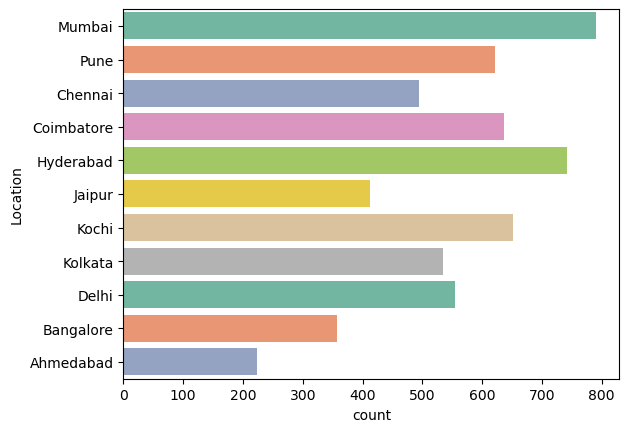

In [47]:
sns.countplot(y='Location', data=train, palette='Set2')
plt.show() 

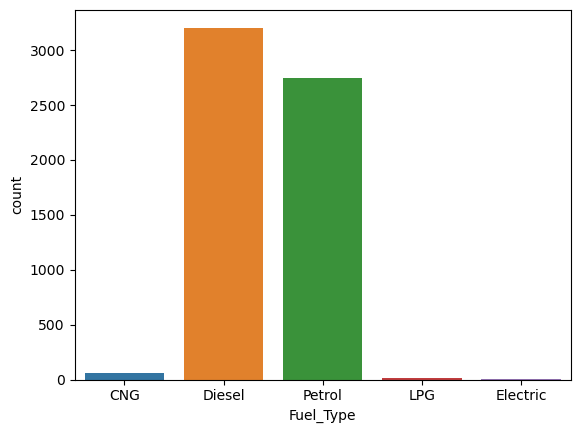

In [48]:
sns.countplot(x='Fuel_Type', data=train)
plt.show() 

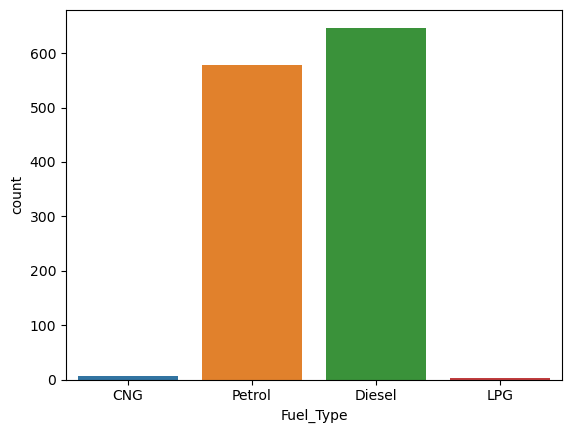

In [49]:
sns.countplot(x='Fuel_Type', data=test)
plt.show() 

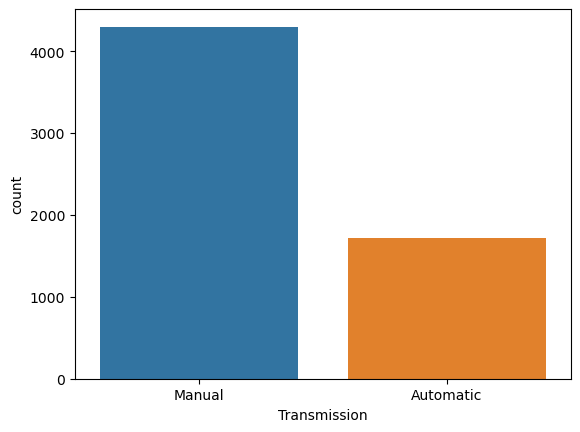

In [50]:
sns.countplot(x='Transmission', data=train)
plt.show() 

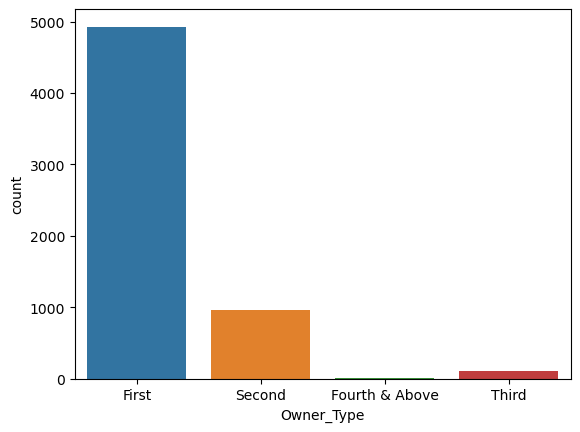

In [51]:
sns.countplot(x='Owner_Type', data=train)
plt.show()

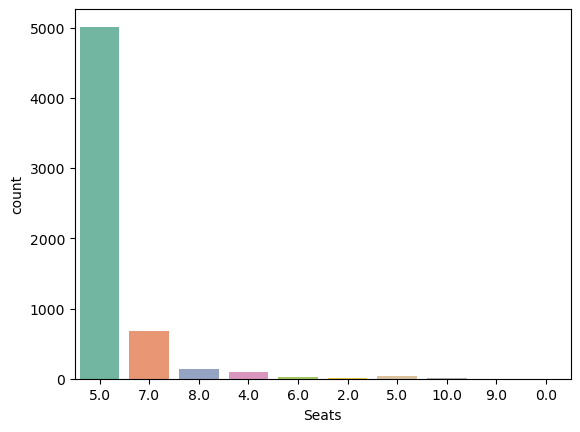

In [52]:
sns.countplot(x='Seats', data=train, palette='Set2')
plt.show()

In [53]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [54]:
train['Mileage'] = train['Mileage'].str.replace(' km/kg', '')
train['Mileage'] = train['Mileage'].str.replace(' kmpl', '')
train['Mileage'] = pd.to_numeric(train['Mileage'], errors='coerce')

In [55]:
train['Engine'] = train['Engine'].str.replace(' CC', '')
train['Engine'] = pd.to_numeric(train['Engine'], errors='coerce')

In [56]:
train['Power'] = train['Power'].str.replace(' bhp', '')
train['Power'] = train['Power'].str.replace('null', '0.0')
train['Power'] = pd.to_numeric(train['Power'], errors='coerce')

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   int64  
 9   Power              6019 non-null   float64
 10  Seats              6019 non-null   object 
 11  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 611.3+ KB


In [58]:
train.Location = train.Location.astype('category')

In [59]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74


<AxesSubplot:xlabel='Year', ylabel='Price'>

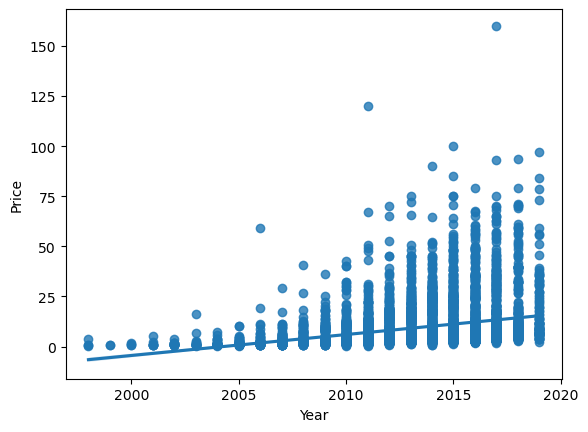

In [60]:
sns.regplot(x='Year',y='Price',data=train)  

In [ ]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()

In [ ]:
train['Location'] = number.fit_transform(train['Location'].astype('str'))
train['Name'] = number.fit_transform(train['Name'].astype('str'))
train['Fuel_Type'] = number.fit_transform(train['Fuel_Type'].astype('str'))
train['Transmission'] = number.fit_transform(train['Transmission'].astype('str'))
train['Owner_Type'] = number.fit_transform(train['Owner_Type'].astype('str'))
train['Mileage'] = number.fit_transform(train['Mileage'].astype('str'))
train['Engine'] = number.fit_transform(train['Engine'].astype('str'))
train['Power'] = number.fit_transform(train['Power'].astype('str'))

test['Location'] = number.fit_transform(test['Location'].astype('str'))
test['Name'] = number.fit_transform(test['Name'].astype('str'))
test['Fuel_Type'] = number.fit_transform(test['Fuel_Type'].astype('str'))
test['Transmission'] = number.fit_transform(test['Transmission'].astype('str'))
test['Owner_Type'] = number.fit_transform(test['Owner_Type'].astype('str'))
test['Mileage'] = number.fit_transform(test['Mileage'].astype('str'))
test['Engine'] = number.fit_transform(test['Engine'].astype('str'))
test['Power'] = number.fit_transform(test['Power'].astype('str'))

In [61]:
temp_df = pd.get_dummies(train['Location'])
train = pd.concat([train,temp_df],axis=1)
train.drop(['Location'],axis=1,inplace=True)

In [62]:
temp_df = pd.get_dummies(train['Fuel_Type'])
train = pd.concat([train,temp_df],axis=1)
train.drop(['Fuel_Type'],axis=1,inplace=True)

In [63]:
temp_df = pd.get_dummies(train['Transmission'])
train = pd.concat([train,temp_df],axis=1)
train.drop(['Transmission'],axis=1,inplace=True)

In [64]:
temp_df = pd.get_dummies(train['Owner_Type'])
train = pd.concat([train,temp_df],axis=1)
train.drop(['Owner_Type'],axis=1,inplace=True)

In [65]:
train.drop(['Name'],axis=1,inplace=True)

In [66]:
train['Seats'] = train['Seats'].astype('float')

In [67]:
train.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Ahmedabad,Bangalore,Chennai,...,Diesel,Electric,LPG,Petrol,Automatic,Manual,First,Fourth & Above,Second,Third
0,2010,72000,26.60,998,58.16,5.0,1.75,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,2015,41000,19.67,1582,126.20,5.0,12.50,0,0,0,...,1,0,0,0,0,1,1,0,0,0
2,2011,46000,18.20,1199,88.70,5.0,4.50,0,0,1,...,0,0,0,1,0,1,1,0,0,0
3,2012,87000,20.77,1248,88.76,7.0,6.00,0,0,1,...,1,0,0,0,0,1,1,0,0,0
4,2013,40670,15.20,1968,140.80,5.0,17.74,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [40]:
test['Mileage'] = test['Mileage'].str.replace(' km/kg', '')
test['Mileage'] = test['Mileage'].str.replace(' kmpl', '')
test['Mileage'] = pd.to_numeric(test['Mileage'], errors='coerce')

In [41]:
test['Engine'] = test['Engine'].str.replace(' CC', '')
test['Engine'] = pd.to_numeric(test['Engine'], errors='coerce')

In [42]:
test['Power'] = test['Power'].str.replace(' bhp', '')
test['Power'] = test['Power'].str.replace('null', '0.0')
test['Power'] = pd.to_numeric(test['Power'], errors='coerce')

In [43]:
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998,58.20,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796,47.30,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393,147.80,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364,0.00,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197,82.85,5.0


In [44]:
test.drop(['Name'],axis=1,inplace=True)

In [45]:
temp_df = pd.get_dummies(test['Location'])
test = pd.concat([test,temp_df],axis=1)
test.drop(['Location'],axis=1,inplace=True)

In [46]:
temp_df = pd.get_dummies(test['Transmission'])
test = pd.concat([test,temp_df],axis=1)
test.drop(['Transmission'],axis=1,inplace=True)

In [47]:
temp_df = pd.get_dummies(test['Owner_Type'])
test = pd.concat([test,temp_df],axis=1)
test.drop(['Owner_Type'],axis=1,inplace=True)

In [48]:
temp_df = pd.get_dummies(test['Fuel_Type'])
test = pd.concat([test,temp_df],axis=1)
test.drop(['Fuel_Type'],axis=1,inplace=True)

In [49]:
test.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Ahmedabad,Bangalore,Chennai,Coimbatore,...,Automatic,Manual,First,Fourth & Above,Second,Third,CNG,Diesel,LPG,Petrol
0,2014,40929,32.26,998,58.20,4.0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
1,2013,54493,24.70,796,47.30,5.0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
2,2017,34000,13.68,2393,147.80,7.0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
3,2012,139000,23.59,1364,0.00,5.0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
4,2014,29000,18.50,1197,82.85,5.0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1


In [50]:
train.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Ahmedabad,Bangalore,Chennai,...,Diesel,Electric,LPG,Petrol,Automatic,Manual,First,Fourth & Above,Second,Third
0,2010,72000,26.60,998,58.16,5.0,1.75,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,2015,41000,19.67,1582,126.20,5.0,12.50,0,0,0,...,1,0,0,0,0,1,1,0,0,0
2,2011,46000,18.20,1199,88.70,5.0,4.50,0,0,1,...,0,0,0,1,0,1,1,0,0,0
3,2012,87000,20.77,1248,88.76,7.0,6.00,0,0,1,...,1,0,0,0,0,1,1,0,0,0
4,2013,40670,15.20,1968,140.80,5.0,17.74,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [51]:
train.drop('Electric', axis=1,inplace=True)

In [52]:
train.corr()['Price']

Year                 0.305327
Kilometers_Driven   -0.011493
Mileage             -0.306610
Engine               0.657196
Power                0.757695
Seats                0.052811
Price                1.000000
Ahmedabad           -0.017964
Bangalore            0.086526
Chennai             -0.046130
Coimbatore           0.172026
Delhi                0.006496
Hyderabad            0.009958
Jaipur              -0.089049
Kochi                0.052911
Kolkata             -0.106606
Mumbai              -0.001742
Pune                -0.083550
CNG                 -0.051652
Diesel               0.320645
LPG                 -0.025499
Petrol              -0.309363
Automatic            0.586025
Manual              -0.586025
First                0.091808
Fourth & Above      -0.021445
Second              -0.073552
Third               -0.055297
Name: Price, dtype: float64

In [53]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [54]:
features = list(train.columns)
features.remove('Price')
target = ['Price']
X = train[features]
y = train[target]

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.7,random_state=5)

# Model Building 

**1. Random Forest**

In [56]:
from sklearn.ensemble import RandomForestRegressor 
parameters = {'bootstrap': True,
              'min_samples_leaf': 1,
              'n_estimators':100,       #accuracy is almost same for 300 
              'min_samples_split': 2,
              'max_features': 'sqrt',
              'max_depth': 15}

rf = RandomForestRegressor(**parameters)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [57]:
print(f'MAE: {(metrics.mean_absolute_error(y_test, rf_pred))}')
print(f'R^2: {(metrics.r2_score(y_test, rf_pred))}')
print(f'MSE: {(mean_squared_error(y_test, rf_pred))}')
print(f'RMSE: {(metrics.mean_squared_error(y_test, rf_pred,squared=False))}')

MAE: 1.8901937447899404
R^2: 0.8656819558395961
MSE: 15.857580621900226
RMSE: 3.982157784656483


**2. XGBoost**

In [58]:
import xgboost as xgb
xgbr = xgb.XGBRegressor(objective='reg:squarederror')
xgbr.fit(X_train, y_train)
 
xg_pred = xgbr.predict(X_test)

In [59]:
print(f'MAE: {(metrics.mean_absolute_error(y_test, xg_pred))}')
print(f'R^2: {(metrics.r2_score(y_test, xg_pred))}')
print(f'MSE: {(mean_squared_error(y_test, xg_pred))}')
print(f'RMSE: {(metrics.mean_squared_error(y_test, xg_pred,squared=False))}')

MAE: 1.8666931255980017
R^2: 0.8182432460994584
MSE: 21.458191984322955
RMSE: 4.632298779690593


**3. SVM**

In [60]:
from sklearn.svm import SVR
svm = SVR(kernel = 'rbf')
svm.fit(X_train, y_train)

svm_pred = svm.predict(X_test)

In [61]:
print(f'MAE: {(metrics.mean_absolute_error(y_test, svm_pred))}')
print(f'R^2: {(metrics.r2_score(y_test, svm_pred))}')
print(f'MSE: {(mean_squared_error(y_test, svm_pred))}')
print(f'RMSE: {(metrics.mean_squared_error(y_test, svm_pred,squared=False))}')

MAE: 5.8805720353215785
R^2: -0.07916708983593113
MSE: 127.40640498858242
RMSE: 11.287444573001562


**4. KNN**

In [62]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

In [63]:
print(f'MAE: {(metrics.mean_absolute_error(y_test, knn_pred))}')
print(f'R^2: {(metrics.r2_score(y_test, knn_pred))}')
print(f'MSE: {(mean_squared_error(y_test, knn_pred))}')
print(f'RMSE: {(metrics.mean_squared_error(y_test, knn_pred,squared=False))}')

MAE: 4.357369878183833
R^2: 0.4780499515489408
MSE: 61.621392908558775
RMSE: 7.849929484304861


**5. Linear Regression**

In [64]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train,(y_train))
reg_pred = reg.predict(X_test)

In [65]:
print(f'MAE: {(metrics.mean_absolute_error(y_test, reg_pred))}')
print(f'R^2: {(metrics.r2_score(y_test, reg_pred))}')
print(f'MSE: {(mean_squared_error(y_test, reg_pred))}')
print(f'RMSE: {(metrics.mean_squared_error(y_test, reg_pred,squared=False))}')

MAE: 3.9374981005955423
R^2: 0.6376212951683309
MSE: 42.782409194892026
RMSE: 6.540826338842213


# Prediction

In [66]:
predictors = list(test.columns)
pred = rf.predict(test[predictors])

In [67]:
sub=pd.DataFrame()
sub['Price'] = np.round(pred,2)
sub.head()

,Price
0,7.39
1,9.89
2,17.79
3,5.81
4,9.09


In [68]:
sub = pd.read_csv('submission.csv',header=None)

### Model Comparison

In [69]:
scores = {'Model':['RF','XGB','SVM','KNN', 'LR'],
          'RMSE' : [3.95,4.63,11.28,7.84,6.54]}
results = pd.DataFrame(scores)
results

,Model,RMSE
0,RF,3.95
1,XGB,4.63
2,SVM,11.28
3,KNN,7.84
4,LR,6.54


The best model is Random Forest with RMSE value 3.95.

### UI Model

In [ ]:
pickle.dump(rf, open("car_rf.pkl", "wb"))